In [1]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

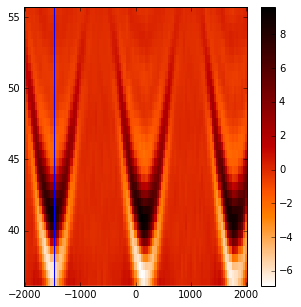

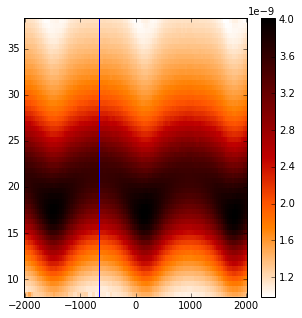

(1640.0, -660.0)

In [2]:
data_abs = prepare_data("data_npy/92_dd.npy", 35, 70)
data_lc = prepare_data("data_npy/92.npy", 6, 60)
calibration_phase_axis(data_abs, data_lc, 2, 12, 20, 35, plot=True)

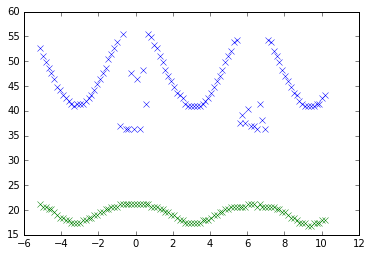

In [3]:
# Peak position are simply chosen as the maxima of each data cut for a fixed phase.
lc_pos = np.array([data_lc['x'][np.argmax(d)] for d in data_lc['z']])
abs_pos = np.array([data_abs['x'][np.argmax(d)] for d in data_abs['z']])
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(data_abs['y'], abs_pos, 'x')
plt.plot(data_lc['y'], lc_pos, 'x')

In [4]:
# These spurious points are removed manually; then we zip phi and V coordinates together
lc_line = zip(data_lc['y'], lc_pos)
abs_line = zip(np.concatenate((data_abs['y'][:28], data_abs['y'][38:69], data_abs['y'][80:])),
               np.concatenate((abs_pos[:28], abs_pos[38:69], abs_pos[80:])))

In [5]:
lines = merge_points(lc_line, abs_line)

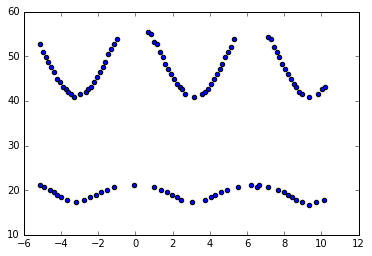

In [6]:
# This is the final dataset
# No error bars (yet..)
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Estimating parameters for the 100 nm device

From David's estimate for $I_J^c$, I take $E_J/h \approx 39.8$ GHz.

The highest measured value for the plasma frequency is $\omega_p\approx 21.2$ GHz, slightly smaller than the one extracted from a fit of the LC resonance at pinch-off, $\omega_\textrm{pinch-off}\approx 24.4$ GHz.

I estimate charging energy as $E_C \approx \omega_p^2 / 2 E_J = 21.2^2 / (2 \cdot 39.8)$ GHz $\approx 5.65$ GHz.

For $E_A$ and transmission $T$, I take similar values as for the $30$ nm device: $E_A\approx 33$ GHz, $T\approx 0.5$.

This gives the set of initial values for the fitting.

## Fit with two free parameters

In [7]:
%%capture
p0 = [31, 0.5]
fit_1 = fit_abs_model(lines, 41, p0, Ej=39.8, Ec=5.65, max_tol=5e-6)

In [8]:
fit_1['popt']

array([ 28.95639642,   0.55397156])

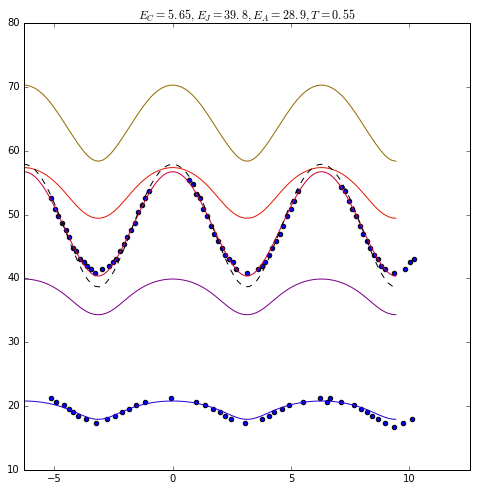

In [12]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, n_fluxes=100)

## Fit with three free parameters

In [14]:
%%capture
p0 = [5.65, 29, 0.55]
fit_2 = fit_abs_model(lines, 41, p0, Ej=39.8)

In [15]:
fit_2['popt']

array([  5.56557985,  28.94780038,   0.55298609])

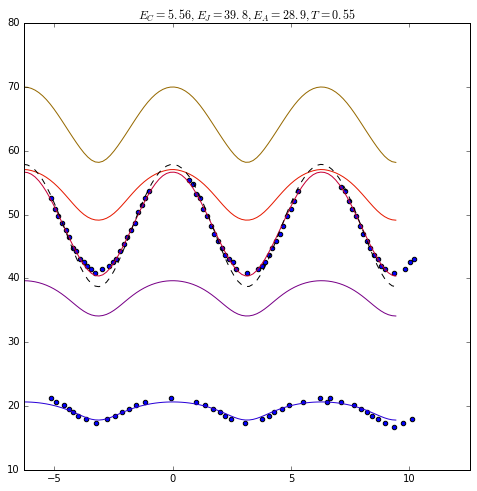

In [16]:
plot_fit_results(fit_2, lines, Ej=39.8)

## Fit with four free parameters

In [19]:
%%capture
p0 = [5.56, 39.8, 29, 0.55]
fit_3 = fit_abs_model(lines, 41, p0)

In [20]:
fit_3['popt']

array([  7.94215255,  29.92520094,  29.19996747,   0.57511862])

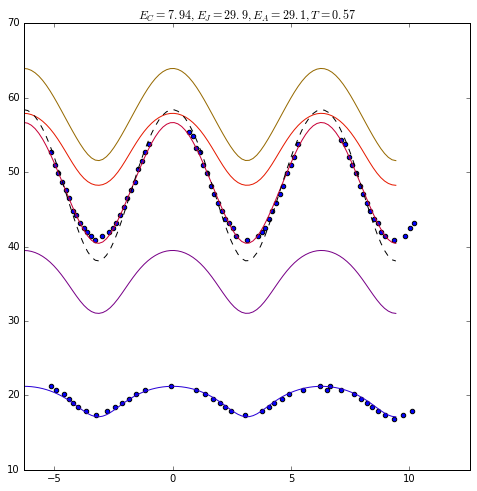

In [22]:
plot_fit_results(fit_3, lines)